## Import Libs

In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

pd.set_option('display.max_columns',100)

## Phase 1: Data Preparation & Cleaning
- ✅ 1. Load the Data
- ✅ 2. Clean the Data
- ✅ 3. Feature Engineering

### ✅ 1. Load the Data

In [2]:
df = pd.read_csv("../data/sales dataset.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### ✅ 2. Clean the Data

In [7]:
# Drop null values
df.dropna(axis=0,inplace=True)
df.drop("Row ID",axis=1,inplace=True)

In [8]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)

In [11]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9784,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9785,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9786,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format="mixed")
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format="mixed")

### ✅ 3. Feature Engineering

#### 1. Shipping Duration

In [13]:
df["ShippingDuration"] =  (df['Ship Date'] - df['Order Date']).dt.days

In [14]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23


In [15]:
idx = df[df['Order Date']>df['Ship Date']].index.tolist()
df.drop(idx,axis=0,inplace=True)

In [16]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064,2
9780,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.772,2
9781,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832,2
9782,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240,2


#### 2. Time-Based Features

In [17]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['day_of_week'] = df['Order Date'].dt.dayofweek
df['is_weekend'] = (df['day_of_week']>= 5).astype(int)
df['Quarter'] = df['month'].apply(lambda x:1 if x <=3 else round(x/3))

In [18]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration,year,month,day_of_week,is_weekend,Quarter
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92,2017,8,4,0,3
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92,2017,8,4,0,3
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5,2018,4,6,1,1
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153,2017,5,4,0,2
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4,2016,11,1,0,4


In [19]:
df.is_weekend.value_counts()

is_weekend
0    5470
1    2634
Name: count, dtype: int64

In [20]:
df['Quarter'] = df['Quarter'].apply(lambda x: round(x))
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration,year,month,day_of_week,is_weekend,Quarter
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92,2017,8,4,0,3
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92,2017,8,4,0,3
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5,2018,4,6,1,1
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153,2017,5,4,0,2
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4,2016,11,1,0,4


In [21]:
df.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
ShippingDuration    0
year                0
month               0
day_of_week         0
is_weekend          0
Quarter             0
dtype: int64

**✅ Phase 1 Complete: Data cleaning and feature engineering are now finished. The dataset is fully prepared and ready for analysis.**
**Next Step — Phase 2: Let’s move on to the analysis and insight generation stage.**

## Phase 2: Exploratory Data Analysis (EDA) & Visualization
- ✅ 4. General Overview
- ✅ 5. Top-Selling Products Analysis
- ✅ 6. SEO Optimization
- ✅ 7. Pricing Strategy

### ✅ 4. General Overview

#### 1. Descriptive Stats

In [22]:
df.describe(exclude='O').T

,count,mean,min,25%,50%,75%,max,std
Order Date,8104,2017-04-03 17:01:11.076011776,2015-01-02 00:00:00,2016-04-18 00:00:00,2017-05-17 00:00:00,2018-03-28 00:00:00,2018-12-30 00:00:00,NaN
Ship Date,8104,2017-05-15 10:29:33.346495488,2015-01-15 00:00:00,2016-06-20 00:00:00,2017-07-12 00:00:00,2018-06-01 00:00:00,2019-05-01 00:00:00,NaN
Postal Code,8104.0,55436.663746,1040.0,23434.0,59601.0,90005.0,99301.0,31937.147511
Sales,8104.0,234.150872,0.444,17.22,54.432,210.995,22638.48,661.643335
ShippingDuration,8104.0,41.728036,0.0,4.0,5.0,89.0,214.0,58.041509
year,8104.0,2016.731491,2015.0,2016.0,2017.0,2018.0,2018.0,1.124691
month,8104.0,6.819719,1.0,4.0,7.0,10.0,12.0,3.443728
day_of_week,8104.0,2.961007,0.0,1.0,3.0,5.0,6.0,2.121442
is_weekend,8104.0,0.325025,0.0,0.0,0.0,1.0,1.0,0.468413
Quarter,8104.0,2.355257,1.0,1.0,2.0,3.0,4.0,1.112028


In [23]:
df.describe(include='O').T

,count,unique,top,freq
Order ID,8104,4040,CA-2018-100111,14
Ship Mode,8104,4,Standard Class,4628
Customer ID,8104,791,MA-17560,34
Customer Name,8104,791,Matt Abelman,34
Segment,8104,3,Consumer,4231
Country,8104,1,United States,8104
City,8104,506,New York City,762
State,8104,48,California,1640
Region,8104,4,West,2603
Product ID,8104,1839,TEC-AC-10002049,15


#### 2. Outliers Detection

In [24]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

outs = df[(df['Sales'] < Q1 - 1.5*IQR) | (df['Sales'] > Q3 + 1.5*IQR)]
outs

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration,year,month,day_of_week,is_weekend,Quarter
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92,2017,8,4,0,3
16,CA-2015-105893,2015-11-11,2015-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,7,2015,11,2,0,4
24,CA-2016-106320,2016-09-25,2016-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,5,2016,9,6,1,3
27,US-2016-150630,2016-09-17,2016-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,4,2016,9,5,1,3
35,CA-2017-117590,2017-08-12,2017-10-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,61,2017,8,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,CA-2018-167395,2018-02-12,2018-04-12,First Class,KM-16720,Kunst Miller,Consumer,United States,Lowell,Massachusetts,1852.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,979.950,59,2018,2,0,0,1
9723,CA-2015-114321,2015-08-20,2015-08-25,Standard Class,NC-18535,Nick Crebassa,Corporate,United States,Hampton,Virginia,23666.0,South,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,896.990,5,2015,8,3,0,3
9736,US-2015-140914,2015-11-11,2015-11-15,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Chicago,Illinois,60653.0,Central,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.944,4,2015,11,2,0,4
9762,CA-2015-169019,2015-07-26,2015-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,4,2015,7,6,1,2


In [25]:
outs.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,934,2017-03-12 14:44:58.072805120,2015-01-03 00:00:00,2016-03-12 06:00:00,2017-03-19 00:00:00,2018-03-10 18:00:00,2018-12-29 00:00:00,NaN
Ship Date,934,2017-04-20 14:21:50.492505344,2015-01-15 00:00:00,2016-05-11 00:00:00,2017-06-06 00:00:00,2018-05-17 00:00:00,2019-02-01 00:00:00,NaN
Postal Code,934.0,53640.785867,1841.0,21044.0,53142.0,90008.0,99301.0,32812.904437
Sales,934.0,1314.060997,501.81,637.005,879.984,1362.165,22638.48,1543.039581
ShippingDuration,934.0,38.98394,0.0,3.0,5.0,61.75,214.0,56.061985
year,934.0,2016.649893,2015.0,2016.0,2017.0,2018.0,2018.0,1.134339
month,934.0,7.068522,1.0,4.0,8.0,10.0,12.0,3.493926
day_of_week,934.0,2.889722,0.0,1.0,3.0,5.0,6.0,2.111481
is_weekend,934.0,0.316916,0.0,0.0,0.0,1.0,1.0,0.465524
Quarter,934.0,2.443255,1.0,1.0,3.0,3.0,4.0,1.123887


### ✅ 5. Univariate Analysis

#### 1. Numeric Features

In [26]:
df.select_dtypes(include='number').columns

Index(['Postal Code', 'Sales', 'ShippingDuration', 'year', 'month',
       'day_of_week', 'is_weekend', 'Quarter'],
      dtype='object')

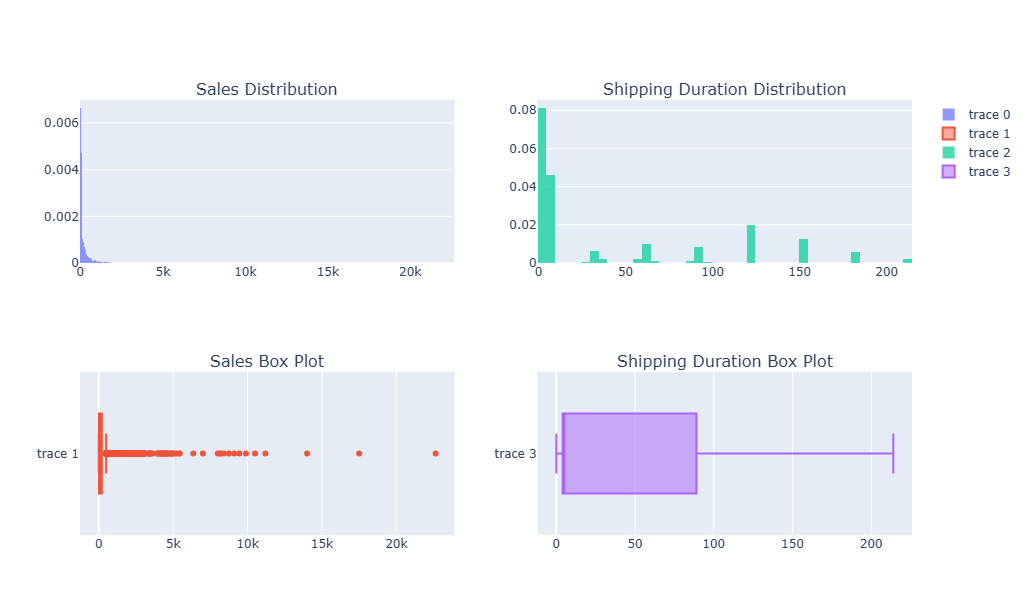

In [27]:
fig = make_subplots(rows=2,cols=2,
                   subplot_titles=['Sales Distribution','Shipping Duration Distribution',
                                  'Sales Box Plot','Shipping Duration Box Plot'])

fig.add_trace(go.Histogram(x=df['Sales'],
                          histnorm='probability density',
                          opacity=0.7),row=1,col=1)

fig.add_trace(go.Box(x=df['Sales'],),row=2,col=1)

fig.add_trace(go.Histogram(x=df['ShippingDuration'],
                          histnorm='probability density',
                          opacity=0.7),row=1,col=2)

fig.add_trace(go.Box(x=df['ShippingDuration'],),row=2,col=2)
fig.update_layout(
    width=1400,
    height=600
)

fig.show()

In [28]:
df['Sales'].skew()

np.float64(13.090426328209436)

In [29]:
(df['Sales'] == 0).any()

np.False_

In [30]:
df['is_weekend'].value_counts(normalize=True)

is_weekend
0    0.674975
1    0.325025
Name: proportion, dtype: float64

#### 2. Categorical Features

In [31]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'ShippingDuration', 'year', 'month', 'day_of_week',
       'is_weekend', 'Quarter'],
      dtype='object')

In [32]:
df['Order ID'].value_counts().head(10)

Order ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
CA-2017-105732    10
CA-2016-131338    10
US-2016-126977    10
CA-2016-158421     9
US-2016-163433     9
US-2017-114013     9
Name: count, dtype: int64

In [33]:
df[df['Order ID']=='CA-2018-100111']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration,year,month,day_of_week,is_weekend,Quarter
6087,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.646,6,2018,9,3,0,3
6088,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,TEC-AC-10002647,Technology,Accessories,Logitech Wireless Boombox Speaker - portable -...,212.800,6,2018,9,3,0,3
6089,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,OFF-PA-10000807,Office Supplies,Paper,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",38.520,6,2018,9,3,0,3
6090,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.640,6,2018,9,3,0,3
6091,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",45.400,6,2018,9,3,0,3
6092,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,OFF-PA-10002713,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity...",13.760,6,2018,9,3,0,3
6093,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.991,6,2018,9,3,0,3
6094,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",11.784,6,2018,9,3,0,3
6095,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,4.360,6,2018,9,3,0,3
6096,CA-2018-100111,2018-09-20,2018-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035.0,East,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Sta...,2888.127,6,2018,9,3,0,3


In [34]:
df[df['Order ID']=='CA-2018-157987']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ShippingDuration,year,month,day_of_week,is_weekend,Quarter
1946,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,OFF-AR-10000658,Office Supplies,Art,Newell 324,23.100,120,2018,2,4,0,1
1947,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,FUR-FU-10001196,Furniture,Furnishings,DAX Cubicle Frames - 8x10,11.540,120,2018,2,4,0,1
1948,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,254.526,120,2018,2,4,0,1
1949,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,12.980,120,2018,2,4,0,1
1950,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,OFF-BI-10004970,Office Supplies,Binders,"ACCOHIDE 3-Ring Binder, Blue, 1""",26.432,120,2018,2,4,0,1
1951,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,TEC-PH-10003885,Technology,Phones,Cisco SPA508G,197.970,120,2018,2,4,0,1
1952,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,OFF-LA-10001641,Office Supplies,Labels,Avery 518,18.900,120,2018,2,4,0,1
1953,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,1282.410,120,2018,2,4,0,1
1954,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,OFF-AR-10004582,Office Supplies,Art,BIC Brite Liner Grip Highlighters,4.920,120,2018,2,4,0,1
1955,CA-2018-157987,2018-02-09,2018-06-09,Standard Class,AC-10615,Ann Chong,Corporate,United States,New York City,New York,10009.0,East,TEC-AC-10002842,Technology,Accessories,WD My Passport Ultra 2TB Portable External Har...,238.000,120,2018,2,4,0,1


In [35]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    4628
Second Class      1596
First Class       1344
Same Day           536
Name: count, dtype: int64

In [36]:
df['Segment'].value_counts(normalize=True)

Segment
Consumer       0.522088
Corporate      0.300592
Home Office    0.177320
Name: proportion, dtype: float64

In [37]:
df['State'].value_counts()

State
California              1640
New York                 924
Texas                    822
Pennsylvania             476
Illinois                 396
Ohio                     394
Washington               392
Florida                  303
Michigan                 209
North Carolina           205
Arizona                  190
Virginia                 189
Tennessee                160
Georgia                  149
Colorado                 143
Kentucky                 109
Massachusetts            108
Indiana                  102
Oregon                    95
Wisconsin                 90
New Jersey                83
Maryland                  81
Minnesota                 77
Delaware                  71
Connecticut               62
Arkansas                  53
Oklahoma                  52
Alabama                   51
Missouri                  50
Utah                      49
Mississippi               44
Rhode Island              41
South Carolina            37
Nebraska                  35
New Mexi

In [38]:
df['Region'].value_counts()

Region
West       2603
East       2279
Central    1891
South      1331
Name: count, dtype: int64

In [39]:
df['Category'].value_counts(normalize=True)

Category
Office Supplies    0.603282
Furniture          0.212734
Technology         0.183983
Name: proportion, dtype: float64

In [40]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1265
Paper          1098
Furnishings     767
Phones          712
Storage         686
Art             655
Accessories     624
Chairs          509
Appliances      378
Labels          285
Tables          263
Envelopes       194
Bookcases       185
Fasteners       169
Supplies        159
Machines        101
Copiers          54
Name: count, dtype: int64

### ✅ 6. Bivariate Analysis

#### 1️⃣ Sales vs Categorical Variables

##### 1. Top 10 States On Sales

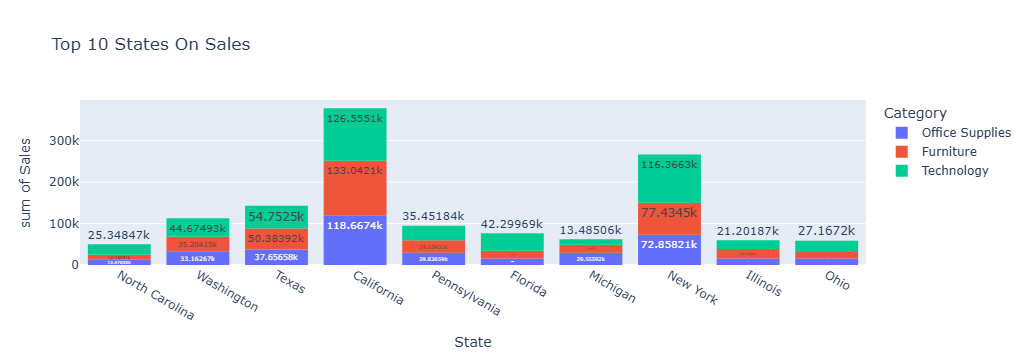

In [41]:
top_States = df['State'].value_counts().head(10).index.tolist()
fig = px.histogram(
    data_frame=df[df['State'].isin(top_States)],
    x = 'State',
    y='Sales',
    color='Category',
    text_auto=True,
    title='Top 10 States On Sales'

)
fig.show()

##### 2. Top 10 Products on Sales

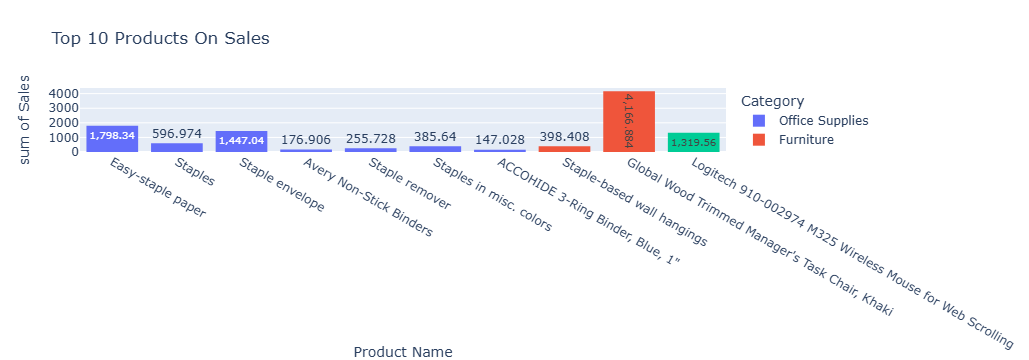

In [42]:
top_States = df['Product Name'].value_counts().head(10).index.tolist()
fig = px.histogram(
    data_frame=df[df['Product Name'].isin(top_States)],
    x = 'Product Name',
    y='Sales',
    color='Category',
    text_auto=True,
    title='Top 10 Products On Sales'

)
fig.show()

##### 3. Sales by Category

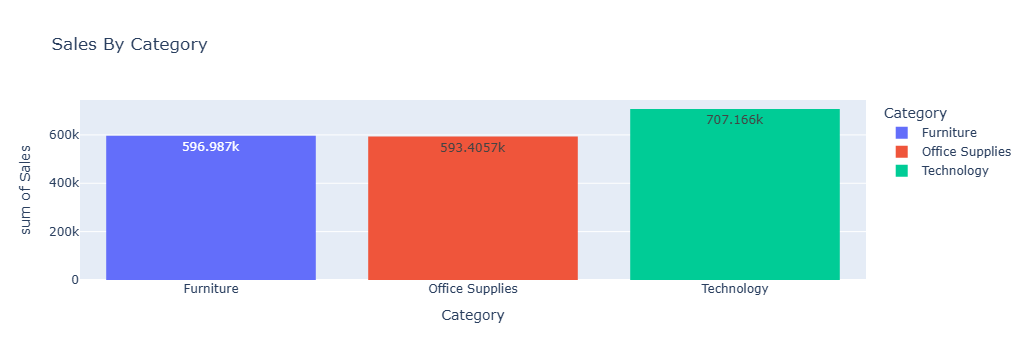

In [43]:
fig = px.histogram(
    data_frame=df,
    x = 'Category',
    y = 'Sales',
    text_auto=True,
    title='Sales By Category',
    color='Category'
)
fig.show()

##### 4. Sales by Sub-Category

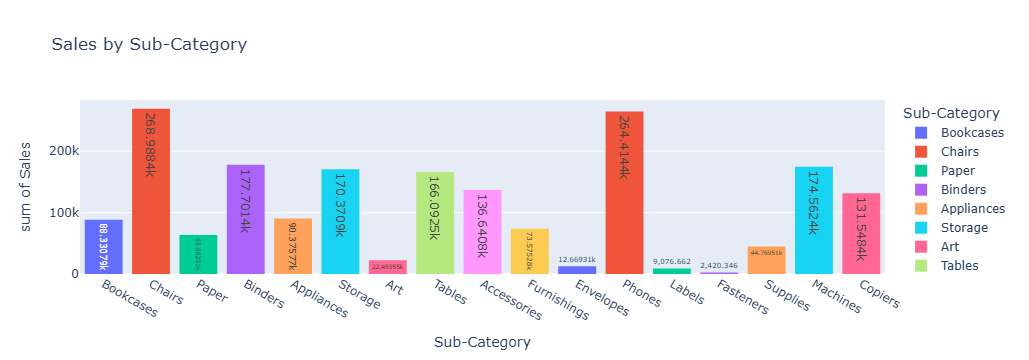

In [44]:
fig = px.histogram(
    data_frame=df,
    x = 'Sub-Category',
    y = 'Sales',
    text_auto=True,
    title='Sales by Sub-Category',
    color='Sub-Category'
)
fig.show()

##### 5. Sales by Segment

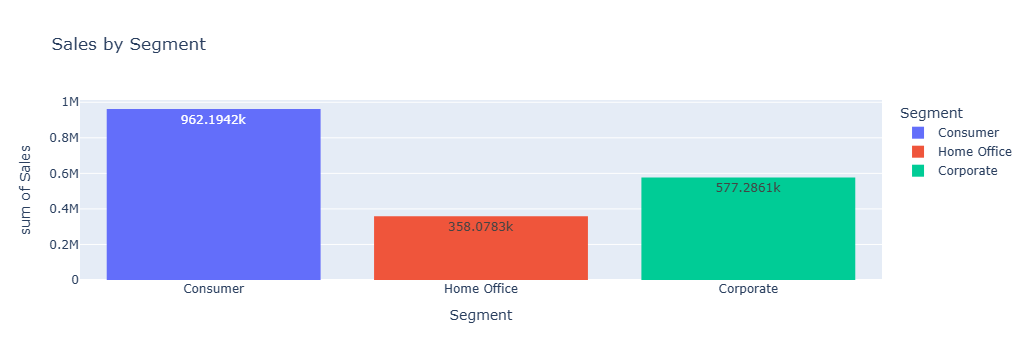

In [45]:
fig = px.histogram(
    data_frame=df,
    x = 'Segment',
    y = 'Sales',
    text_auto=True,
    title='Sales by Segment',
    color='Segment'
)
fig.show()

##### 6. Sales by Ship Mode

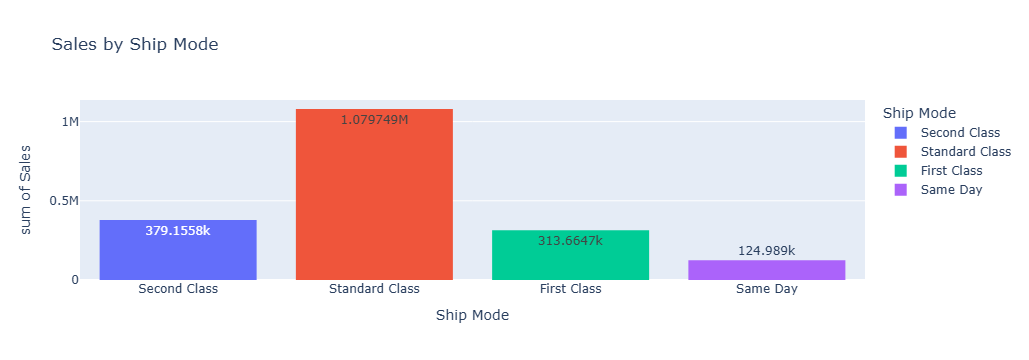

In [46]:
fig = px.histogram(
    data_frame=df,
    x = 'Ship Mode',
    y = 'Sales',
    text_auto=True,
    title='Sales by Ship Mode',
    color='Ship Mode'
)
fig.show()

##### 7. Sales by Region

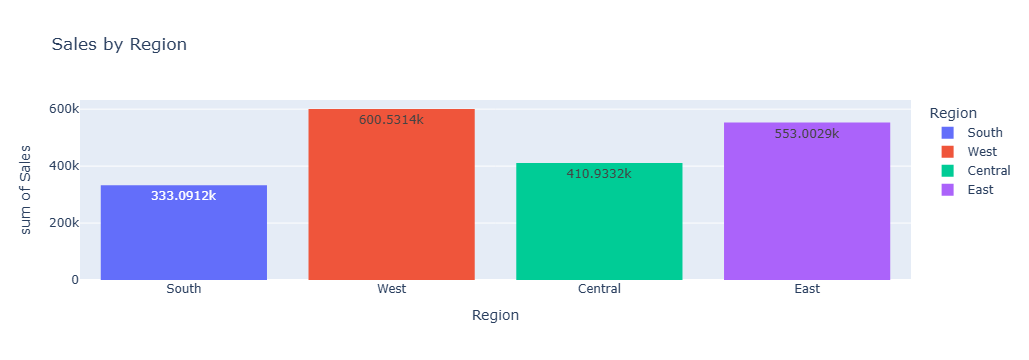

In [47]:
fig = px.histogram(
    data_frame=df,
    x = 'Region',
    y = 'Sales',
    text_auto=True,
    title='Sales by Region',
    color='Region'
)
fig.show()

#### 2️⃣ Sales vs Time (Trend / Seasonality)

##### 1. Sales over Time

In [48]:
fig = px.line(
    data_frame=df.groupby(['Order Date'],as_index=False)['Sales'].sum(),
    x = 'Order Date',
    y = 'Sales',
    title='Sales Over Time',
)
fig.show()

##### 2. Sales by Year

In [49]:
fig = px.line(
    data_frame=df.groupby(['year'],as_index=False)['Sales'].sum(),
    x = 'year',
    y = 'Sales',
    title='Sales by Year',
)
fig.show()

##### 3. Sales by Month

In [50]:
monthly_sales = (
    df.groupby(['year', 'month'], as_index=False)['Sales']
      .sum()
)

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[
        'Monthly Trend Sales 2015',
        'Monthly Trend Sales 2016',
        'Monthly Trend Sales 2017',
        'Monthly Trend Sales 2018'
    ]
)

years = [2015, 2016, 2017, 2018]
positions = [(1,1), (1,2), (2,1), (2,2)]

for year, (r, c) in zip(years, positions):
    data = monthly_sales[monthly_sales['year'] == year]

    fig.add_trace(
        go.Scatter(
            x=data['month'],
            y=data['Sales'],
            mode='lines+markers',
            name=str(year)
        ),
        row=r,
        col=c
    )

fig.update_layout(
    width=1400,
    height=600,
    showlegend=False
)

fig.show()


##### 4. Sales by Day of Week

In [51]:
df['week'] = df['Order Date'].dt.isocalendar().week
weekly_sales = df.groupby(['year','week'],as_index=False)['Sales'].sum()

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[
        'Weekly Trends 2015',
        'Weekly Trends 2016',
        'Weekly Trends 2017',
        'Weekly Trends 2018'
    ]
)

years = [2015, 2016, 2017, 2018]
positions = [(1,1), (1,2), (2,1), (2,2)]

for year, (r, c) in zip(years, positions):
    data = weekly_sales[weekly_sales['year'] == year]

    fig.add_trace(
        go.Scatter(
            x=data['week'],
            y=data['Sales'],
            mode='lines+markers',
            name=str(year)
        ),
        row=r,
        col=c
    )

fig.update_layout(
    width=1400,
    height=600,
    showlegend=False
)

fig.show()

##### 5. Weekend vs Weekday Sales

In [52]:
fig = px.box(data_frame=df,
            y = 'Sales',
            x = 'is_weekend',
            color='is_weekend',
            title='Weekend Vs Weekday')

fig.update_layout(
    width=800,
    height=750,
    showlegend=False
)

fig.show()

##### 6. Sales by Quarter

In [53]:
Quarterly_sales = df.groupby(['year','Quarter'],as_index=False)['Sales'].sum()

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[
        'Quarter Trends 2015',
        'Quarter Trends 2016',
        'Quarter Trends 2017',
        'Quarter Trends 2018'
    ]
)

years = [2015, 2016, 2017, 2018]
positions = [(1,1), (1,2), (2,1), (2,2)]

for year, (r, c) in zip(years, positions):
    data = Quarterly_sales[Quarterly_sales['year'] == year]

    fig.add_trace(
        go.Scatter(
            x=data['Quarter'],
            y=data['Sales'],
            mode='lines+markers',
            name=str(year)
        ),
        row=r,
        col=c
    )

fig.update_layout(
    width=1400,
    height=600,
    showlegend=False
)

fig.show()

#### 3️⃣ Sales vs Numeric Variables

##### 1. Sales Vs Shipping Duration

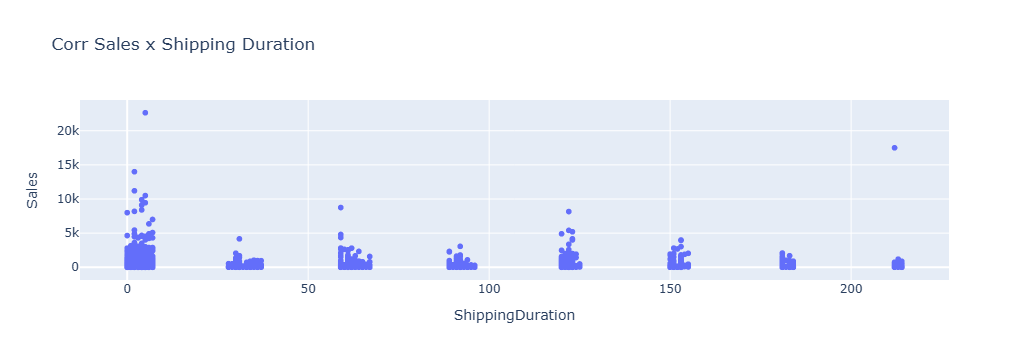

In [54]:
fig = px.scatter(data_frame=df,
                y = 'Sales',
                x = 'ShippingDuration',
                title='Corr Sales x Shipping Duration')
fig.show()

**✅ Phase 2 Completed: General overview , Univariate and Bivariate.—>Phase 3: Let’s move on to Statistical tests & Correlation Matrix**
## Phase 3: Groupby and Modeling-Oriented Statistical Diagnostics
- ✅ 7. Groupby
- ✅ 8. Data Integrity & Distribution Check
- ✅ 9. Numeric Features → Relationship Diagnostics
- ✅ 10. Categorical Features → Relationship Diagnostics

### ✅ 7. Groupby

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8104 entries, 0 to 9783
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          8104 non-null   object        
 1   Order Date        8104 non-null   datetime64[ns]
 2   Ship Date         8104 non-null   datetime64[ns]
 3   Ship Mode         8104 non-null   object        
 4   Customer ID       8104 non-null   object        
 5   Customer Name     8104 non-null   object        
 6   Segment           8104 non-null   object        
 7   Country           8104 non-null   object        
 8   City              8104 non-null   object        
 9   State             8104 non-null   object        
 10  Postal Code       8104 non-null   float64       
 11  Region            8104 non-null   object        
 12  Product ID        8104 non-null   object        
 13  Category          8104 non-null   object        
 14  Sub-Category      8104 non-nu

In [56]:
data = (
    df.groupby("Order Date", as_index=False)
      .agg(
          Num_Orders=('Order ID', 'nunique'),
          Num_Customers=('Customer ID', 'nunique'),
          Num_Products=('Product ID', 'nunique'),

          Total_Sales=('Sales', 'sum'),
          Avg_Sales=('Sales', 'mean'),

          Avg_Shipping_Duration=('ShippingDuration', 'mean'),
          Max_Shipping_Duration=('ShippingDuration', 'max'),

          Num_Ship_Modes=('Ship Mode', 'nunique'),
          Num_Segments=('Segment', 'nunique'),
          Num_States=('State', 'nunique'),
          Num_Regions=('Region', 'nunique'),

          # dominant categorical signal (optional)
          Top_Ship_Mode=('Ship Mode', lambda x: x.mode()[0]),
          Top_Segment=('Segment', lambda x: x.mode()[0]),

          # time features (safe since grouped by date)
          month=('month', 'first'),
          day_of_week=('day_of_week', 'first'),
          is_weekend=('is_weekend', 'first'),
          Quarter=('Quarter', 'first'),
          week=('week', 'first'),
          year=('year', 'first')
      )
)

data.reset_index(drop=True, inplace=True)

In [57]:
data

,Order Date,Num_Orders,Num_Customers,Num_Products,Total_Sales,Avg_Sales,Avg_Shipping_Duration,Max_Shipping_Duration,Num_Ship_Modes,Num_Segments,Num_States,Num_Regions,Top_Ship_Mode,Top_Segment,month,day_of_week,is_weekend,Quarter,week,year
0,2015-01-02,1,1,1,468.9000,468.900000,59.000000,59,1,1,1,1,First Class,Consumer,1,4,0,1,1,2015
1,2015-01-03,5,5,10,2203.1510,220.315100,135.300000,181,2,2,4,3,Standard Class,Consumer,1,5,1,1,1,2015
2,2015-01-04,2,2,4,119.8880,29.972000,151.000000,151,2,2,2,2,Second Class,Consumer,1,6,1,1,1,2015
3,2015-01-06,4,4,11,5188.5200,471.683636,151.000000,151,2,3,4,3,Standard Class,Home Office,1,1,0,1,2,2015
4,2015-01-07,2,2,3,601.0240,200.341333,130.333333,151,2,1,2,2,Standard Class,Corporate,1,2,0,1,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2018-12-26,4,4,4,814.5940,203.648500,4.000000,6,2,3,4,2,Standard Class,Corporate,12,2,0,4,52,2018
1067,2018-12-27,1,1,2,177.6360,88.818000,0.000000,0,1,1,1,1,Same Day,Corporate,12,3,0,4,52,2018
1068,2018-12-28,10,10,18,1657.3508,87.228989,32.473684,94,3,3,9,4,Standard Class,Consumer,12,4,0,4,52,2018
1069,2018-12-29,6,6,12,2915.5340,242.961167,30.750000,123,3,2,5,4,Standard Class,Consumer,12,5,1,4,52,2018


### ✅ 8. Data Integrity & Distribution Check

#### 1️⃣ Skewness Check (Numeric Features)

In [58]:
numeric_cols = data.select_dtypes(include='number').columns

skewness = data[numeric_cols].skew().sort_values(ascending=False)
print(skewness)

Avg_Sales                5.308174
Total_Sales              3.429335
Num_Customers             1.45734
Num_Orders               1.455515
Num_Products             1.355472
Num_States               1.123365
Avg_Shipping_Duration    1.101332
Max_Shipping_Duration    1.011664
is_weekend               0.846612
Num_Ship_Modes           0.491573
Quarter                  0.329161
Num_Regions              0.237341
Num_Segments             0.129783
week                     0.098894
month                    0.064966
day_of_week              0.060413
year                    -0.074073
dtype: Float64


#### 2️⃣ Outliers Detection

In [59]:
from datasist.structdata import detect_outliers
outs = detect_outliers(data,n=0,features=['Total_Sales'])
data.iloc[outs]['Total_Sales'].describe()

count       70.000000
mean      8391.948814
std       3518.058948
min       5418.022000
25%       6333.405000
50%       7322.472000
75%       8964.308500
max      28106.716000
Name: Total_Sales, dtype: float64

### ✅ 9. Numeric Features → Relationship Diagnostics

#### 1️⃣ Pearson Correlation Matrix

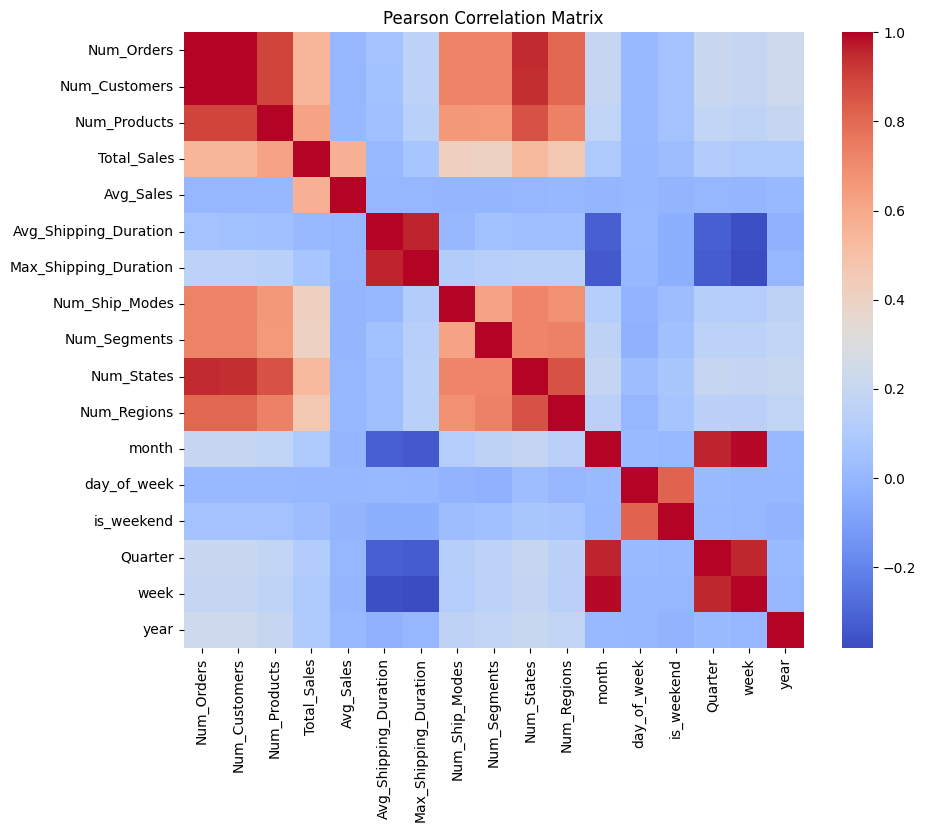

In [60]:
corr_matrix = data.corr(method='pearson',numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Pearson Correlation Matrix")
plt.show()

#### 2️⃣ Spearman Correlation

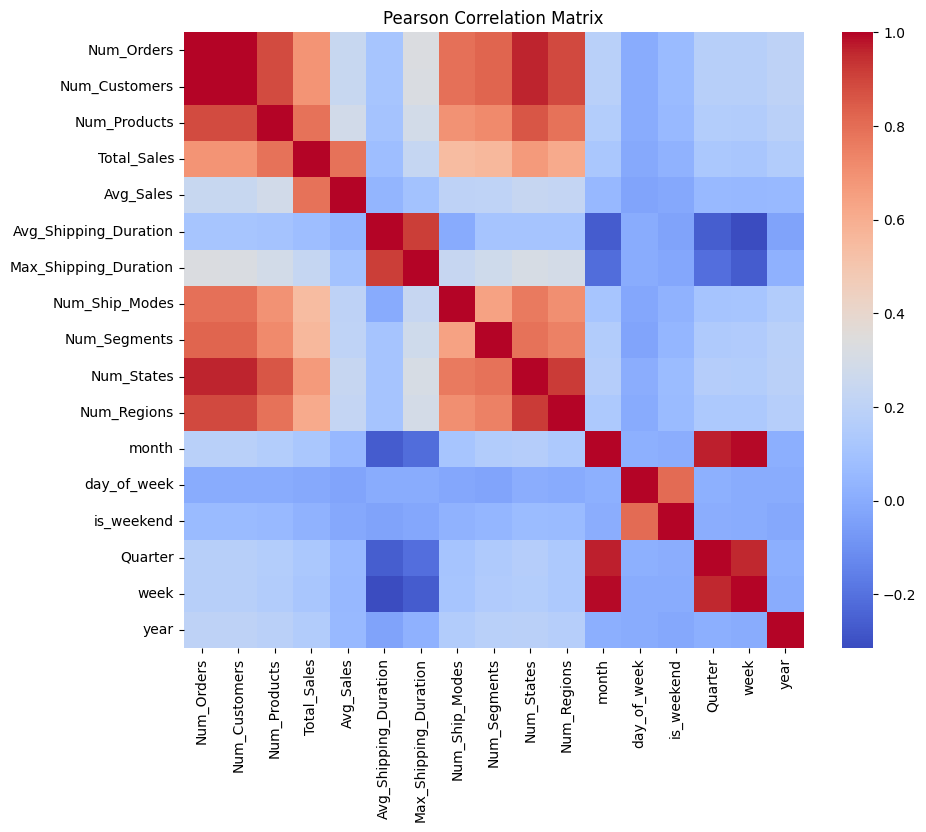

In [61]:
corr_matrix = data.corr(method='spearman',numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Pearson Correlation Matrix")
plt.show()

#### 3️⃣ Multicollinearity (VIF)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Step 1: select numeric columns only
numeric_cols = data.select_dtypes(include=['int64','float64','int32','UInt32']).columns

# Step 2: drop target + non-numeric date columns
X_vif = data[numeric_cols].drop(columns=['Sales'], errors='ignore')

# Step 3: convert all to float
X_vif = X_vif.astype(float)

# Step 4: compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                  Feature          VIF
0              Num_Orders  1705.873171
1           Num_Customers  1658.195937
11                  month   345.608749
15                   week   282.704341
14                Quarter    71.599409
9              Num_States    43.620041
10            Num_Regions    25.964393
6   Max_Shipping_Duration    24.000631
5   Avg_Shipping_Duration    22.727478
16                   year    21.203266
8            Num_Segments    17.805509
2            Num_Products    16.088642
7          Num_Ship_Modes    14.081332
12            day_of_week     9.352532
3             Total_Sales     5.393145
13             is_weekend     4.457458
4               Avg_Sales     3.312134


### ✅ 10. Categorical Feature Impact on Target

#### 1️⃣ Mean Sales per Category

In [63]:
data.groupby("Top_Ship_Mode")[["Total_Sales",'Avg_Sales']].mean().sort_values(by='Total_Sales',ascending=False)

,Total_Sales,Avg_Sales
Top_Ship_Mode,,
Standard Class,2068.393784,219.980012
Second Class,1558.465951,278.009261
First Class,1297.962588,230.243572
Same Day,1006.677362,235.001965


In [64]:
data.groupby("Top_Segment")[["Total_Sales",'Avg_Sales']].mean().sort_values(by='Total_Sales',ascending=False)

,Total_Sales,Avg_Sales
Top_Segment,,
Home Office,1897.764816,253.531524
Consumer,1761.533409,227.833243
Corporate,1736.168217,235.159560


## Phase 4: Data Preparing
- ✅ 11. Clustring
- ✅ 12. X,y

### ✅ 11. Clustring

In [65]:
# Machine learning models & tools
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler , RobustScaler  , MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### 1. Encode Data

In [66]:
data.select_dtypes(include='object').columns

Index(['Top_Ship_Mode', 'Top_Segment'], dtype='object')

In [67]:
for col in data.select_dtypes(include='object').columns:
    print(f"""{col} --> Nunique = {data[col].nunique()}""")

Top_Ship_Mode --> Nunique = 4
Top_Segment --> Nunique = 3


In [68]:
onh = ['Top_Ship_Mode', 'Top_Segment']

encoder = ColumnTransformer(
    transformers=[
        (
            'OneHot Categories',
            OneHotEncoder(),
            onh
        )
    ],
    remainder='passthrough'
)

#### 2. Steps

In [69]:
steps = [
    ('Encoding',encoder),
    ('Scaling',StandardScaler()),
    ("Model",KMeans())
]

#### 3. Optimal Cluster

In [70]:
def Optimal_cluster(data, encoder, n_max=7):

    wcss = []
    silhouette_scores = []
    calinski_scores = []
    davies_scores = []

    cluster_range = range(2, n_max + 1)

    # preprocessing فقط
    preprocess = Pipeline([
        ('Encoding', encoder),
        ('Scaling', StandardScaler())
    ])

    X_transformed = preprocess.fit_transform(data)

    for k in cluster_range:
        kmeans = KMeans(
            n_clusters=k,
            random_state=42,
            n_init=20,
            init='k-means++'
        )

        labels = kmeans.fit_predict(X_transformed)

        # WCSS (Elbow)
        wcss.append(kmeans.inertia_)

        # Metrics
        silhouette_scores.append(silhouette_score(X_transformed, labels))
        calinski_scores.append(calinski_harabasz_score(X_transformed, labels))
        davies_scores.append(davies_bouldin_score(X_transformed, labels))

    print(f"The Optimal n_clusters by Elbow Method is: {np.argmin(wcss)+2}") # +2 because range starts from 2
    print(f"The Optimal n_clusters by Silhouette Score is: { np.argmax(silhouette_scores) + 2}")
    print(f"The Optimal n_clusters by Calinski Score is: {np.argmax(calinski_scores) + 2}")
    print(f"The Optimal n_clusters by Davies Score is: {np.argmin(davies_scores) + 2}")
   

    

    suggestions = [
        np.argmin(wcss) + 2,
        np.argmax(silhouette_scores) + 2,
        np.argmax(calinski_scores) + 2,
        np.argmin(davies_scores) + 2
    ]

    optimal_k = max(set(suggestions), key=suggestions.count)
    print(f"Consensus optimal clusters: {optimal_k}") # most frequently suggested number of clusters

    return wcss, silhouette_scores, calinski_scores, davies_scores, cluster_range

wcss,silhouette_scores,calinski_scores,davies_scores,cluster_range=Optimal_cluster(data=data.drop(['Order Date','year'],axis=1),n_max=7,encoder=encoder) # apply the function

The Optimal n_clusters by Elbow Method is: 7
The Optimal n_clusters by Silhouette Score is: 2
The Optimal n_clusters by Calinski Score is: 2
The Optimal n_clusters by Davies Score is: 7
Consensus optimal clusters: 2


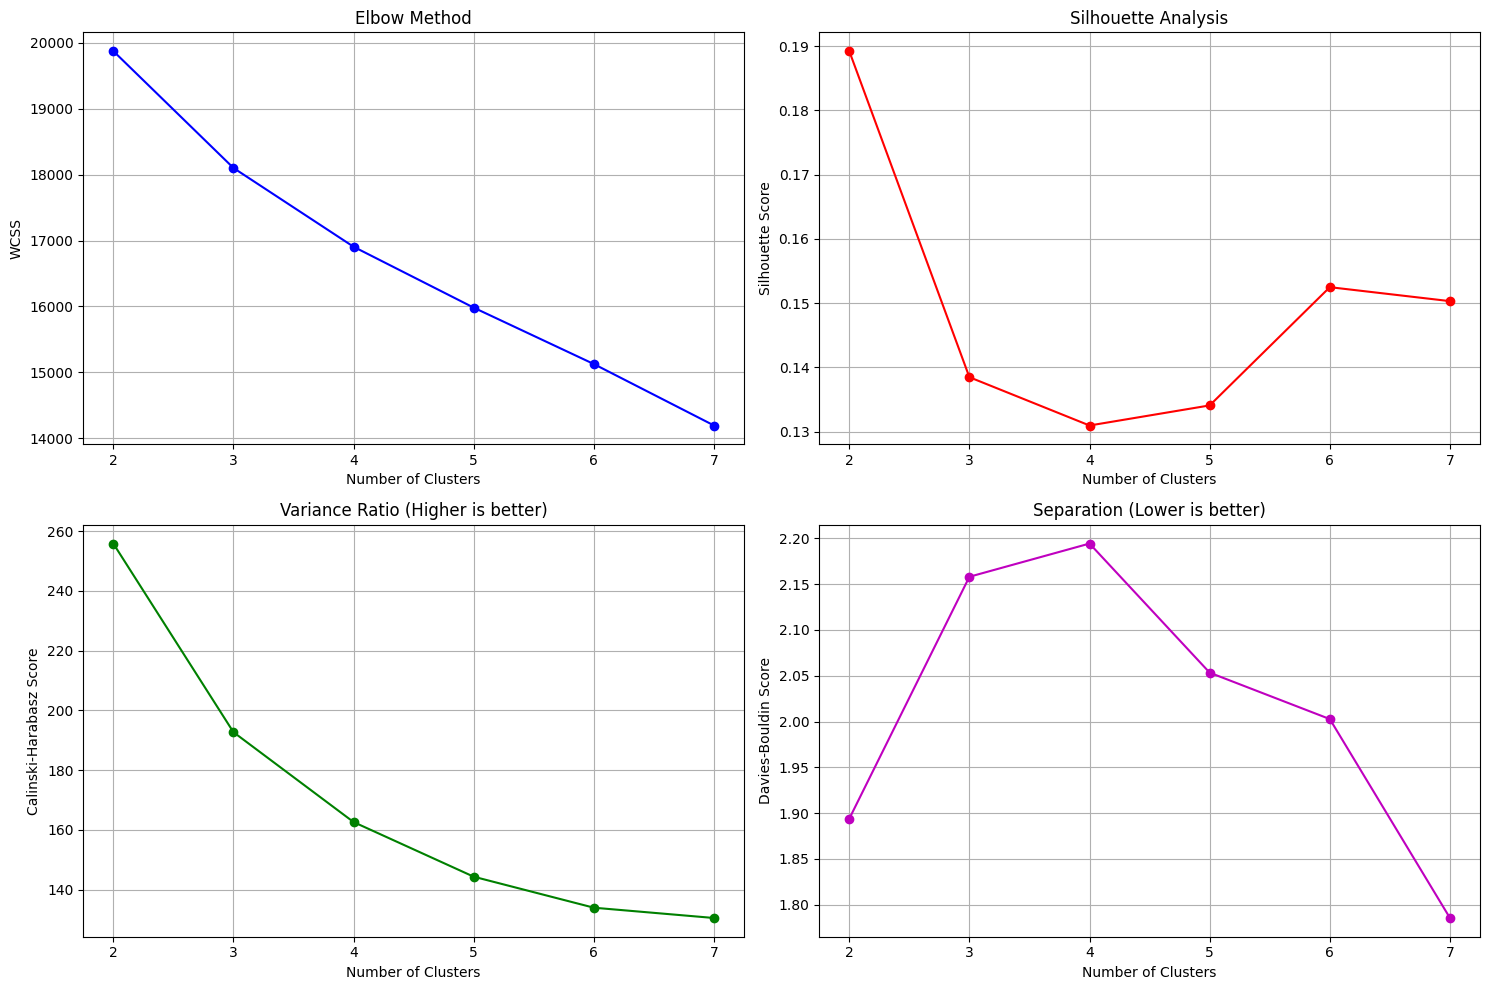

In [71]:
# now let's plot all the metrics to visualize
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Elbow Method
ax1.plot(cluster_range, wcss, 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Silhouette Score
ax2.plot(range(2, 8), silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True)

# Calinski-Harabasz Score (Higher is better)
ax3.plot(range(2,8), calinski_scores, 'go-')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Calinski-Harabasz Score')
ax3.set_title('Variance Ratio (Higher is better)')
ax3.grid(True)

# Davies-Bouldin Score (Lower is better)
ax4.plot(range(2, 8), davies_scores, 'mo-')
ax4.set_xlabel('Number of Clusters')
ax4.set_ylabel('Davies-Bouldin Score')
ax4.set_title('Separation (Lower is better)')
ax4.grid(True)

plt.tight_layout()
plt.show()

#### 4. Hyper Parameter

In [72]:
# let's tune hyperparameters for KMeans we can use it evvery time we want to use KMeans
def hyperparameter (data,max_iter_range = 500 , n_clusters = 2,init_algorithem="auto",encoder=encoder,scaler=StandardScaler):
    """
    Hyperparameter tuning for KMeans clustering.

    Parameters:
    ----------
    data : array-like
        Scaled dataframe or numpy array.
    max_iter_range : int, default=500
        Maximum number of iterations to try (looped in steps of 100).
    n_clusters : int, default=2
        Number of clusters for KMeans.
    init_algorithem : str or int, default="auto"
        "auto" → test all combos in init_algorithems
        int 1–4 → pick one specific init/algorithm combo
        1: (init = 'k-means++' ,algorithem = "lloyd")
        2: (init = 'random' ,algorithem = "lloyd")
        3: (init = 'k-means++' ,algorithem = 'elkan')
        4: (init = 'random' ,algorithem = 'elkan')

    scaler : MinMaxScaler()

    Returns:
    -------
    pd.DataFrame : Results of each run with evaluation metrics.
    best_model : fitted clustering model (KMeans here)
    best_row : pd.Series (the best parameters row)
    labels : ndarray
        Cluster labels predicted for dataset X
    """


    results = []

    init_algorithems = [
        ('k-means++', 'lloyd'),
        ('random', 'lloyd'),
        ('k-means++', 'elkan'),
        ('random', 'elkan'),
    ]

    if init_algorithem == "auto":
        algos_to_test = init_algorithems
    elif isinstance(init_algorithem, int) and 1 <= init_algorithem <= 4:
        algos_to_test = [init_algorithems[init_algorithem - 1]]
    else:
        raise ValueError("init_algorithem must be 'auto' or integer 1–4")

    # ---------- Preprocessing ----------
    preprocess = Pipeline([
        ('Encoding', encoder),
        ('Scaling', MinMaxScaler())
    ])

    X = preprocess.fit_transform(data)

    # ---------- Grid Search ----------
    for max_iter in range(100, max_iter_range + 1, 100):
        for init, algorithm in algos_to_test:

            model = KMeans(
                n_clusters=n_clusters,
                init=init,
                algorithm=algorithm,
                max_iter=max_iter,
                n_init=20,
                random_state=42
            )

            labels = model.fit_predict(X)

            sil = silhouette_score(X, labels)
            cal = calinski_harabasz_score(X, labels)
            dav = davies_bouldin_score(X, labels)

            results.append({
                "n_clusters": n_clusters,
                "init": init,
                "algorithm": algorithm,
                "max_iter": max_iter,
                "silhouette_score": sil,
                "calinski_harabasz_score": cal,
                "davies_bouldin_score": dav
            })

    results_df = pd.DataFrame(results)

    # ---------- Handle edge case ----------
    if (
        results_df['silhouette_score'].nunique() == 1 and
        results_df['calinski_harabasz_score'].nunique() == 1 and
        results_df['davies_bouldin_score'].nunique() == 1
    ):
        best_row = results_df.iloc[0]

    else:
        scale = scaler()

        results_df[['silhouette_norm', 'calinski_norm']] = scale.fit_transform(
            results_df[['silhouette_score', 'calinski_harabasz_score']]
        )

        results_df['davies_norm'] = 1 - scale.fit_transform(
            results_df[['davies_bouldin_score']]
        )

        results_df['final_score'] = (
            results_df['silhouette_norm'] +
            results_df['calinski_norm'] +
            results_df['davies_norm']
        )

        best_row = results_df.loc[results_df['final_score'].idxmax()]

    # ---------- Refit Best Model ----------
    best_model = KMeans(
        n_clusters=int(best_row['n_clusters']),
        init=best_row['init'],
        algorithm=best_row['algorithm'],
        max_iter=int(best_row['max_iter']),
        n_init=20,
        random_state=42
    )

    labels = best_model.fit_predict(X)

    return results_df, best_row, labels

In [73]:
%%time
results, best_params, labels = hyperparameter(
    data=data.drop(['Order Date','year'], axis=1),
    encoder=encoder,
    n_clusters=2
)

CPU times: total: 20.2 s
Wall time: 4.64 s


In [74]:
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(1071,), dtype=int32)

In [75]:
data['Clusters'] = labels

In [76]:
data

,Order Date,Num_Orders,Num_Customers,Num_Products,Total_Sales,Avg_Sales,Avg_Shipping_Duration,Max_Shipping_Duration,Num_Ship_Modes,Num_Segments,Num_States,Num_Regions,Top_Ship_Mode,Top_Segment,month,day_of_week,is_weekend,Quarter,week,year,Clusters
0,2015-01-02,1,1,1,468.9000,468.900000,59.000000,59,1,1,1,1,First Class,Consumer,1,4,0,1,1,2015,0
1,2015-01-03,5,5,10,2203.1510,220.315100,135.300000,181,2,2,4,3,Standard Class,Consumer,1,5,1,1,1,2015,0
2,2015-01-04,2,2,4,119.8880,29.972000,151.000000,151,2,2,2,2,Second Class,Consumer,1,6,1,1,1,2015,0
3,2015-01-06,4,4,11,5188.5200,471.683636,151.000000,151,2,3,4,3,Standard Class,Home Office,1,1,0,1,2,2015,1
4,2015-01-07,2,2,3,601.0240,200.341333,130.333333,151,2,1,2,2,Standard Class,Corporate,1,2,0,1,2,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2018-12-26,4,4,4,814.5940,203.648500,4.000000,6,2,3,4,2,Standard Class,Corporate,12,2,0,4,52,2018,1
1067,2018-12-27,1,1,2,177.6360,88.818000,0.000000,0,1,1,1,1,Same Day,Corporate,12,3,0,4,52,2018,1
1068,2018-12-28,10,10,18,1657.3508,87.228989,32.473684,94,3,3,9,4,Standard Class,Consumer,12,4,0,4,52,2018,0
1069,2018-12-29,6,6,12,2915.5340,242.961167,30.750000,123,3,2,5,4,Standard Class,Consumer,12,5,1,4,52,2018,0


### ✅ 12. X,Y

In [77]:
x = data.drop(['Order Date','Total_Sales'],axis=1)
y = np.log1p(data['Total_Sales'])

## Phase 5: Modeling

### ✅ 7. Search Loop

In [78]:
# Machine learning models & tools
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)

from sklearn.model_selection import cross_validate, train_test_split

# Time-Series Aware CV
from sklearn.model_selection import TimeSeriesSplit

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

#### 1. Scalers

In [79]:
scalers = [
    ('NoScaler','passthrough'),
    ('StandarScaler',StandardScaler()),
    ('MinMaxScaler',MinMaxScaler()),
    ("RobustScaler",RobustScaler())
]

#### 2. Models

In [80]:
models = [
    ('Ridge', Ridge(alpha=1.0)),
    ('Lasso', Lasso(alpha=0.01)),
    ('RandomForest', RandomForestRegressor(n_estimators=300, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05)),
    ('ExtraTrees', ExtraTreesRegressor(n_estimators=400, random_state=42)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=200, learning_rate=0.05))
]

#### 4. For Loop

In [81]:
tscv = TimeSeriesSplit(n_splits=5)

In [82]:
{'EX__max_depth': None,
 'EX__max_features': 0.7,
 'EX__min_samples_leaf': 5,
 'EX__min_samples_split': 10,
 'EX__n_estimators': 600}

{'EX__max_depth': None,
 'EX__max_features': 0.7,
 'EX__min_samples_leaf': 5,
 'EX__min_samples_split': 10,
 'EX__n_estimators': 600}

In [83]:
%%time
results = []


for model in models:
    print('_' * 60)
    print('Model:', model[0])

    steps = [
        ("Encoding",encoder),
        ("Scaling",StandardScaler()),
        ("Feature Selection",SelectFromModel(estimator=ExtraTreesRegressor(
            n_estimators=600, max_features=0.7,
            random_state=42, min_samples_leaf=5,
            min_samples_split=10 ,n_jobs=-1 ),
            threshold="median")),
        ('model', model[1])
    ]

    pipeline = Pipeline(steps)

    cv_results = cross_validate(
        pipeline,
        x,
        y,
        cv=tscv,
        scoring={
            'MAE': 'neg_mean_absolute_error',
            'RMSE': 'neg_root_mean_squared_error'
        },
        return_train_score=True,
        n_jobs=-1
    )

    train_rmse = -cv_results['train_RMSE'].mean()
    test_rmse = -cv_results['test_RMSE'].mean()
    test_mae = -cv_results['test_MAE'].mean()

    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE : {test_rmse:.2f}")
    print(f"Test MAE  : {test_mae:.2f}")

____________________________________________________________
Model: Ridge
Train RMSE: 0.86
Test RMSE : 0.85
Test MAE  : 0.63
____________________________________________________________
Model: Lasso
Train RMSE: 0.86
Test RMSE : 0.85
Test MAE  : 0.63
____________________________________________________________
Model: RandomForest
Train RMSE: 0.06
Test RMSE : 0.15
Test MAE  : 0.09
____________________________________________________________
Model: GradientBoosting
Train RMSE: 0.04
Test RMSE : 0.11
Test MAE  : 0.08
____________________________________________________________
Model: ExtraTrees
Train RMSE: 0.00
Test RMSE : 0.14
Test MAE  : 0.08
____________________________________________________________
Model: AdaBoost
Train RMSE: 0.34
Test RMSE : 0.41
Test MAE  : 0.31
CPU times: total: 719 ms
Wall time: 22.5 s


### ✅ 14. Model Tuning
**`GradientBoosting`, The Best Model.**

#### 1. Gradient Boosting

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.10, 
                                                    random_state=42)

In [86]:
steps = [
    ("Encoding",encoder),
    ("Scaling",StandardScaler()),
    ("Feature Selection",SelectFromModel(estimator=ExtraTreesRegressor(
            n_estimators=600, max_features=0.7,
            random_state=42, min_samples_leaf=5,
            min_samples_split=10 ,n_jobs=-1 ),
            threshold="median")),
    ('GB', GradientBoostingRegressor(random_state=42))
]

GB = Pipeline(steps)

In [87]:
GB

C:\Users\ahmed\anaconda3\envs\ds\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot Categories',
                                                  OneHotEncoder(),
                                                  ['Top_Ship_Mode',
                                                   'Top_Segment'])])),
                ('Scaling', StandardScaler()),
                ('Feature Selection',
                 SelectFromModel(estimator=ExtraTreesRegressor(max_features=0.7,
                                                               min_samples_leaf=5,
                                                               min_samples_split=10,
                                                               n_estimators=600,
                                                               n_jobs=-1,
                                                               random_state=42),
                                 threshold='median')),
                ('GB', GradientBoostingRegressor(random_state=42))])

In [88]:
param_grid = {
    "GB__n_estimators": [400, 500,600,700,800],
    "GB__learning_rate": [0.01, 0.05, 0.1],
    "GB__max_depth": [3, 5, 7],
    "GB__min_samples_split": [2, 5, 10],
    "GB__min_samples_leaf": [1, 3, 5],
    "GB__subsample": [0.3,0.4,0.5,0.6, 0.8, 1.0],
    "GB__max_features": ["sqrt", None]
}

In [89]:
grid_search = GridSearchCV(
    estimator=GB,
    param_grid=param_grid,
    scoring={
        'MAE': 'neg_mean_absolute_error',
        'RMSE': 'neg_root_mean_squared_error'
    },
    refit='RMSE', 
    cv=8,
    n_jobs=-1,
    verbose=2
)

In [90]:
grid_search

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('Encoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot '
                                                                         'Categories',
                                                                         OneHotEncoder(),
                                                                         ['Top_Ship_Mode',
                                                                          'Top_Segment'])])),
                                       ('Scaling', StandardScaler()),
                                       ('Feature Selection',
                                        SelectFromModel(estimator=ExtraTreesRegressor(max_features=0.7,
                                                                                      min_samples_leaf=5,
                                                                                      min_samples_split=10,
                                                                                      n_estimators...
             param_grid={'GB__learning_rate': [0.01, 0.05, 0.1],
                         'GB__max_depth': [3, 5, 7],
                         'GB__max_features': ['sqrt', None],
                         'GB__min_samples_leaf': [1, 3, 5],
                         'GB__min_samples_split': [2, 5, 10],
                         'GB__n_estimators': [400, 500, 600, 700, 800],
                         'GB__subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0]},
             refit='RMSE',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'RMSE': 'neg_root_mean_squared_error'},
             verbose=2)

In [91]:
%%time
grid_search.fit(x_train,y_train)

Fitting 8 folds for each of 4860 candidates, totalling 38880 fits
CPU times: total: 4min 26s
Wall time: 4h 27min 48s


C:\Users\ahmed\anaconda3\envs\ds\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('Encoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot '
                                                                         'Categories',
                                                                         OneHotEncoder(),
                                                                         ['Top_Ship_Mode',
                                                                          'Top_Segment'])])),
                                       ('Scaling', StandardScaler()),
                                       ('Feature Selection',
                                        SelectFromModel(estimator=ExtraTreesRegressor(max_features=0.7,
                                                                                      min_samples_leaf=5,
                                                                                      min_samples_split=10,
                                                                                      n_estimators...
             param_grid={'GB__learning_rate': [0.01, 0.05, 0.1],
                         'GB__max_depth': [3, 5, 7],
                         'GB__max_features': ['sqrt', None],
                         'GB__min_samples_leaf': [1, 3, 5],
                         'GB__min_samples_split': [2, 5, 10],
                         'GB__n_estimators': [400, 500, 600, 700, 800],
                         'GB__subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0]},
             refit='RMSE',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'RMSE': 'neg_root_mean_squared_error'},
             verbose=2)

In [92]:
cv_results = grid_search.cv_results_

test_rmse  = -cv_results['mean_test_RMSE'].mean()
test_mae   = -cv_results['mean_test_MAE'].mean()

print(f"Test RMSE : {test_rmse:.2f}")
print(f"Test MAE  : {test_mae:.2f}")

Test RMSE : 0.11
Test MAE  : 0.08


In [93]:
-grid_search.best_score_

np.float64(0.0543216786682445)

In [94]:
grid_search.best_params_

{'GB__learning_rate': 0.01,
 'GB__max_depth': 7,
 'GB__max_features': None,
 'GB__min_samples_leaf': 1,
 'GB__min_samples_split': 10,
 'GB__n_estimators': 800,
 'GB__subsample': 0.4}

In [95]:
y_predict = grid_search.best_estimator_.predict(x_test)

y_pred_real = np.expm1(y_predict)
y_test_real = np.expm1(y_test)

print("Gradient Boosting:")
print("MSE:", mean_squared_error(y_test_real, y_pred_real))
print("RMSE:", np.sqrt(mean_squared_error(y_test_real, y_pred_real)))
print("R2:", r2_score(y_test_real, y_pred_real))
print("-"*40)

Gradient Boosting:
MSE: 15234.379079621802
RMSE: 123.42762688969516
R2: 0.9960629227429467
----------------------------------------


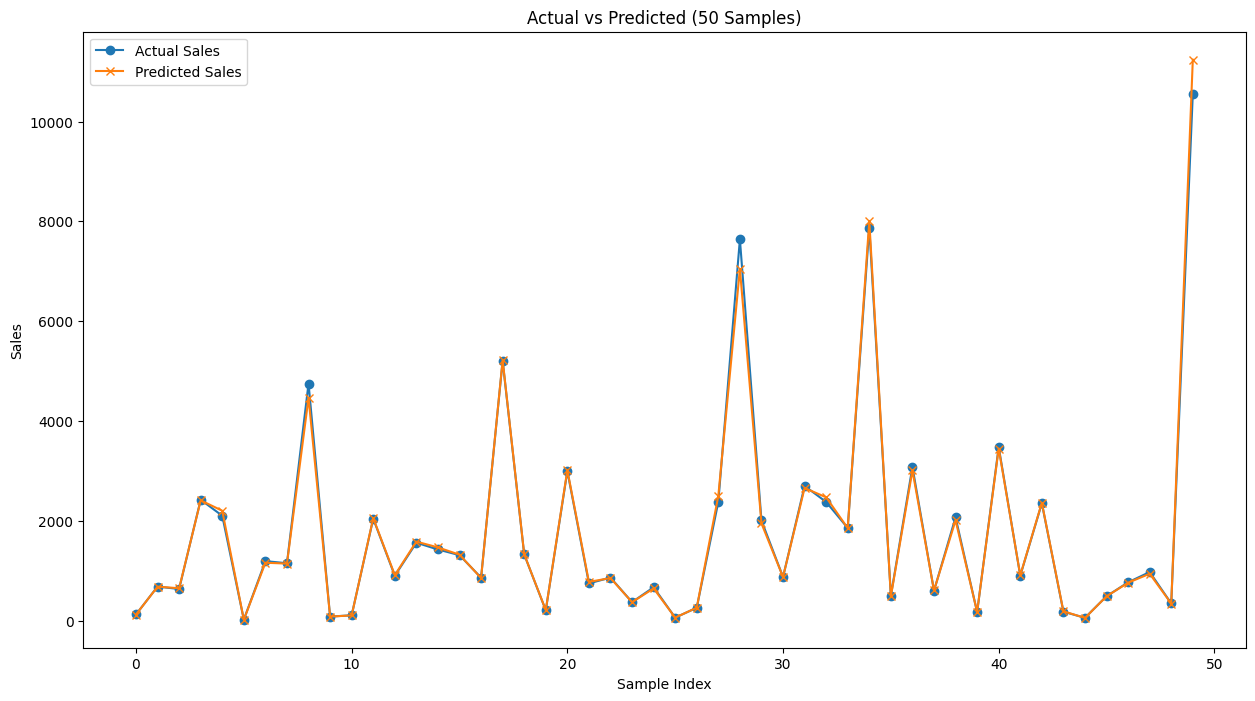

In [96]:
plt.figure(figsize=(15,8))

plt.plot(np.expm1(y_test[:50]).values, 
         label="Actual Sales", marker='o')

plt.plot(np.expm1(y_predict[:50]), 
         label="Predicted Sales", marker='x')

plt.title("Actual vs Predicted (50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.show()